In [63]:
import numpy as np

from sklearn.svm import SVC
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

In [64]:
pipe_long = Pipeline([("scaler", MinMaxScaler()), ("svm", SVC(C=100))])

pipe_short = make_pipeline(MinMaxScaler(), SVC(C=100))

In [65]:
print("Pipeline steps:\n", pipe_short.steps)

Pipeline steps:
 [('minmaxscaler', MinMaxScaler()), ('svc', SVC(C=100))]


In [66]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

pipe = make_pipeline(StandardScaler(), PCA(n_components=2), StandardScaler())
print(pipe.steps)

[('standardscaler-1', StandardScaler()), ('pca', PCA(n_components=2)), ('standardscaler-2', StandardScaler())]


In [67]:
cancer = load_breast_cancer()

In [68]:
pipe.fit(cancer["data"])

Pipeline(steps=[('standardscaler-1', StandardScaler()),
                ('pca', PCA(n_components=2)),
                ('standardscaler-2', StandardScaler())])

In [69]:
components = pipe.named_steps["pca"].components_
print(components)

[[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


In [70]:
from sklearn.linear_model import LogisticRegression

In [71]:
pipe = make_pipeline(StandardScaler(), LogisticRegression())

param_grid = {"logisticregression__C": 10.0 ** np.arange(-2, 2)}

X_train, X_test, y_train, y_test = train_test_split(cancer["data"], cancer["target"], random_state=4)

grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('logisticregression',
                                        LogisticRegression())]),
             param_grid={'logisticregression__C': array([ 0.01,  0.1 ,  1.  , 10.  ])})

In [72]:
grid.best_estimator_.named_steps["logisticregression"].coef_

array([[-0.4475566 , -0.34609376, -0.41703843, -0.52889408, -0.15784407,
         0.60271339, -0.71771325, -0.78367478,  0.04847448,  0.27478533,
        -1.29504052,  0.05314385, -0.69103766, -0.91925087, -0.14791795,
         0.46138699, -0.1264859 , -0.10289486,  0.42812714,  0.71492797,
        -1.08532414, -1.09273614, -0.85133685, -1.04104568, -0.72839683,
         0.07656216, -0.83641023, -0.64928603, -0.6491432 , -0.42968125]])

In [73]:
from sklearn.datasets import fetch_california_housing

california = fetch_california_housing()

In [74]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge

X_train, X_test, y_train, y_test = train_test_split(california["data"], california["target"], random_state=0)

pipe = make_pipeline(
    StandardScaler(),
    PolynomialFeatures(),
    Ridge()
)

In [ ]:
pipe.

In [75]:
param_grid = {"polynomialfeatures__degree": [1, 2, 3],
              "ridge__alpha": 10.0 ** np.arange(-2, 6)}
grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('ridge', Ridge())]),
             param_grid={'polynomialfeatures__degree': [1, 2, 3],
                         'ridge__alpha': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05])})

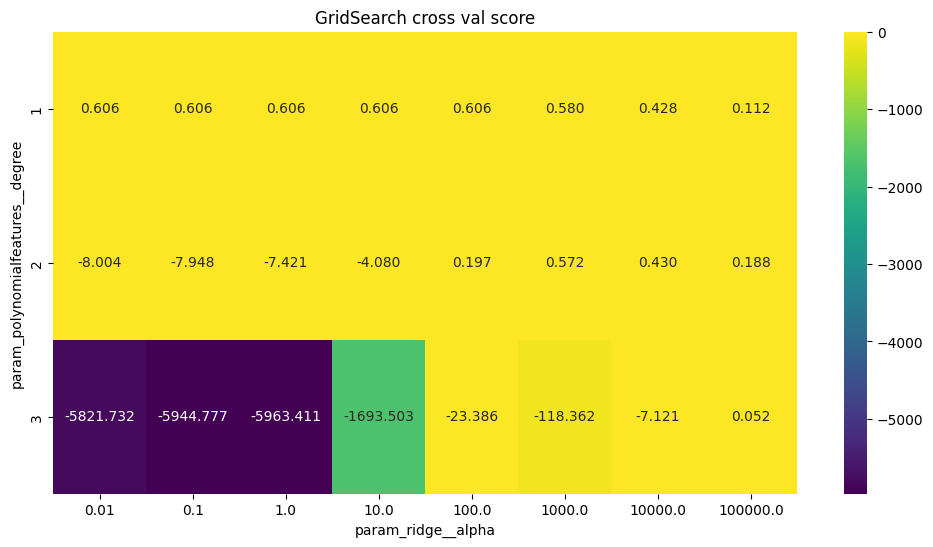

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

results = pd.DataFrame(grid.cv_results_)
results

pivot_table = results.pivot(
    columns="param_ridge__alpha",
    index="param_polynomialfeatures__degree",
    values="mean_test_score"
)

plt.figure(figsize=(12, 6))
sns.heatmap(data=pivot_table,
            annot=True,
            fmt=".3f",
            cmap="viridis")
plt.title("GridSearch cross val score")
plt.show()

In [60]:
grid.best_params_

{'polynomialfeatures__degree': 1, 'ridge__alpha': 10.0}

In [61]:
param_grid = {"ridge__alpha": 10.0 ** np.arange(-3, 2)}
pipe = make_pipeline(
    StandardScaler(),
    Ridge()
)
grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(X_train, y_train)
grid.score(X_test, y_test)


0.5910937377294635

In [84]:
from sklearn.ensemble import RandomForestClassifier

pipe = Pipeline([("preprocessing", StandardScaler()), ("classifier", SVC())])

param_grid = [
    {"classifier": [SVC()],
     "preprocessing": [StandardScaler(), None],
     "classifier__gamma": 10.0 ** np.arange(-3, 2),
     "classifier__C": 10.0 ** np.arange(-3, 2)},

    {"classifier": [RandomForestClassifier(n_estimators=100)],
     "preprocessing": [None],
     "classifier__max_features": [1, 2, 3]}
]


RandomForestClassifier(n_estimators=100)

RandomForestClassifier()

In [85]:
X_train, X_test, y_train, y_test = train_test_split(cancer["data"], cancer["target"], random_state=0)

In [86]:
grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(X_train, y_train)

print("Best param:\n", grid.best_params_)
print("Best cross-validation score:\n", grid.best_score_)
print("Test-set score:\n", grid.score(X_test, y_test))

Best param:
 {'classifier': SVC(), 'classifier__C': 10.0, 'classifier__gamma': 0.01, 'preprocessing': StandardScaler()}
Best cross-validation score:
 0.9858823529411765
Test-set score:
 0.9790209790209791
